# Лабораторная работа №2
**Вариант 12. Набор данных `auto.csv`**

Данные о подержанных авто:
- имя
- год
- цена продажи
- пройдено км
- топливо
- тип продавца
- коробка передач
- тип владельца

---
Подключение бибилотек

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
1. Импорт данных

In [65]:
df = pd.read_csv('./auto2.csv')

---
Получение информации о данных посредством `info()`

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4344 non-null   object 
 1   year          4344 non-null   int64  
 2   SellingPrice  4342 non-null   float64
 3   kmdriven      4343 non-null   float64
 4   fuel          4343 non-null   object 
 5   seller_Type   4344 non-null   object 
 6   transmission  4344 non-null   object 
 7   owner         4344 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 271.6+ KB


---
Получение информации о данных посредством `describe()`

In [67]:
df.describe(include=[np.number])

,year,SellingPrice,kmdriven
count,4344.000000,4.342000e+03,4343.000000
mean,2013.092311,5.039987e+05,66193.063320
std,4.214543,5.784465e+05,46636.648764
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.100000e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


---
Анализ названий столбцов

In [68]:
df.columns

Index(['Name', 'year', 'SellingPrice', 'kmdriven', 'fuel', 'seller_Type',
       'transmission', 'owner'],
      dtype='object')

---
Переименование столбцов

In [69]:
df = df.rename(columns={'Name': 'name', 'SellingPrice': 'selling_price', 'kmdriven': 'km_driven', 'seller_Type': 'seller_type'})
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

---
Проверка на явные дубликаты

In [70]:
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000.0,70000.0,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000.0,50000.0,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4309,Datsun GO Plus T,2017,350000.0,10171.0,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000.0,41123.0,Diesel,Dealer,Manual,First Owner
4311,Toyota Camry Hybrid 2.5,2017,1900000.0,20118.0,Petrol,Dealer,Automatic,First Owner
4340,Renault KWID RXT,2016,225000.0,40000.0,Petrol,Individual,Manual,First Owner


---
Явные дубликаты необходимо удалить

In [71]:
df.drop_duplicates().reset_index(drop=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000.0,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000.0,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
3576,Maruti 800 AC BSIII,2009,110000.0,83000.0,Petrol,Individual,Manual,Second Owner
3577,Hyundai Creta 1.6 CRDi SX Option,2016,865000.0,90000.0,Diesel,Individual,Manual,First Owner
3578,Renault KWID RXT,2016,225000.0,40000.0,Petrol,Individual,Manual,First Owner
3579,Tata Manza Aura Safire BS IV,2010,NaN,NaN,Petrol,Individual,Manual,Second Owner


---
Проверка и исправление неявных дубликатов `fuel`

In [72]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'Petroll', 'CNG', 'LPG', 'Electric', nan],
      dtype=object)

In [73]:
df['fuel'] = df['fuel'].replace('Petroll', 'Petrol')
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric', nan], dtype=object)

---
Проверка и исправление неявных дубликатов `seller_type`

In [74]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Dealeer', 'Trustmark Dealer'],
      dtype=object)

In [75]:
df['seller_type'] = df['seller_type'].replace('Dealeer', 'Dealer')
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

---
Проверка и исправление неявных дубликатов `transmission`

In [76]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

---
Проверка и исправление неявных дубликатов `owner`

In [77]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

---
Проверка и устранение пропусков

In [78]:
def printna(df):
    cc = df.isna()
    rows_with_na = df[cc.any(axis=1)]  # строки, где есть хотя бы один NaN
    print(rows_with_na)

printna(df)

                              name  year  selling_price  km_driven    fuel  \
4342  Tata Manza Aura Safire BS IV  2010            NaN        NaN  Petrol   
4343            Maruti Celerio ZXI  2017            NaN    20000.0     NaN   

     seller_type transmission         owner  
4342  Individual       Manual  Second Owner  
4343  Individual       Manual   First Owner  


> Всего две записи с пропусками из 4000+. Можно просто удалить. Более того, данные о пробеге невозможно восстановить.

In [79]:
df.dropna(axis=0, subset='selling_price', inplace=True)
printna(df)

Empty DataFrame
Columns: [name, year, selling_price, km_driven, fuel, seller_type, transmission, owner]
Index: []


---
2. Матрица диаграмм рассеивания

---
Из графиков видно:
- `selling_price` зависит от `year` и `km_driven`: стоимость автомобиля увеличивается с каждым годом, а машины с большим пробегом стоят дешевле
- по зависимости пробега от года выпускя автомобиля можно сделать вывод, что пробег более новых машин, очевидно, меньше.

Начиная с 2005 года на рынке преобладают автомобили на дизельном топливе.

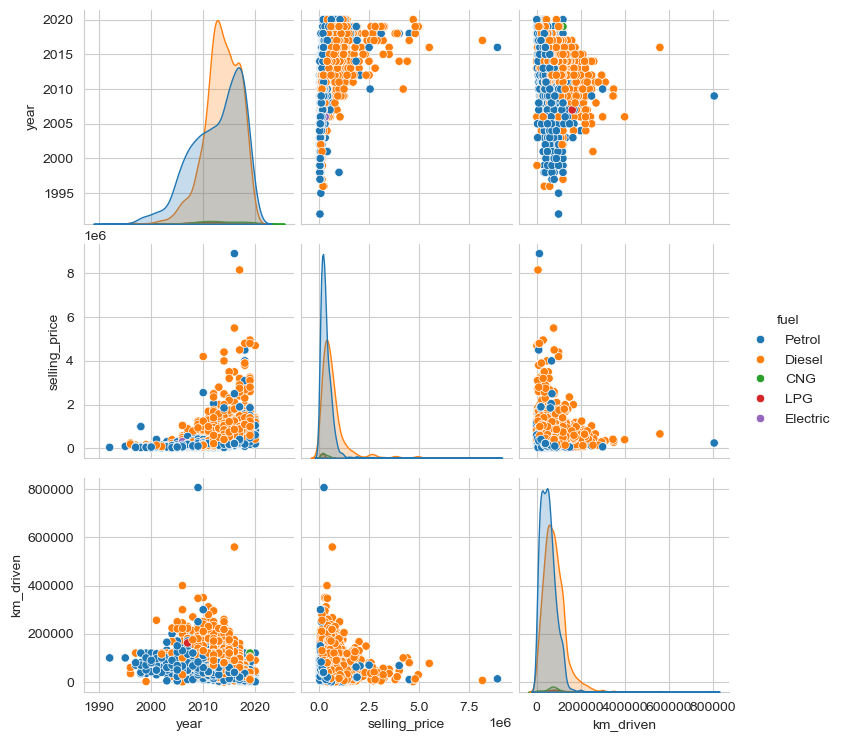

In [80]:
sns.pairplot(df[['year', 'selling_price', 'km_driven', 'fuel']], hue = 'fuel')

---
3. Гистограммы

---
Выводы:
- Большая часть автомобилей произведена с 2012 по 2016 годы с небольшим уклоном в пользу более поздних годов
- Абсолютное большинство представленных автомобилей имеют стоимость в пределах одного-двух миллионов
- Пробег почти никогда не превышает 100.000 км

Text(0, 0.5, 'frequency')

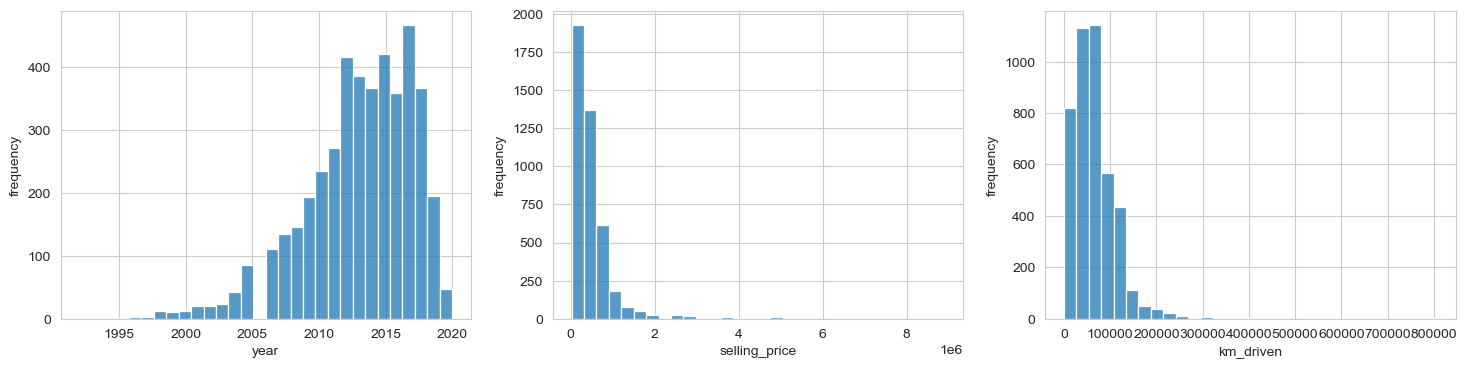

In [81]:
fig, axes = plt.subplots(
    1, # одна строка
    3, # три графика
    figsize=(18, 4) # размер графика
)

sns.histplot(df['year'], bins=30, ax=axes[0])
sns.histplot(df['selling_price'], bins=30, ax=axes[1])
sns.histplot(df['km_driven'], bins=30, ax=axes[2])
axes[0].set_ylabel('frequency')
axes[1].set_ylabel('frequency')
axes[2].set_ylabel('frequency')

---
4. Оценка коэффициентов корреляции и ковариации

In [82]:
df.corr(numeric_only=True)

,year,selling_price,km_driven
year,1.000000,0.413701,-0.419790
selling_price,0.413701,1.000000,-0.192139
km_driven,-0.419790,-0.192139,1.000000


**Выводы:**
1. `year` и `selling_price` имеют положительную корреляцию
2. `year` и `km_driven` имеют отрицательную корреляцию
3. `selling_price` и `km_driven` имеют слабо выраженную отрицательную корреляцию

In [83]:
df.cov(numeric_only=True)

,year,selling_price,km_driven
year,1.776484e+01,1.008626e+06,-8.251658e+04
selling_price,1.008626e+06,3.346003e+11,-5.183319e+09
km_driven,-8.251658e+04,-5.183319e+09,2.174986e+09


**Выводы:**
1. `year` и `selling_price` имеют положительную ковариацию
2. `year` и `km_driven` имеют сильно выраженную сотрицательную ковариацию
3. `selling_price` и `km_driven` имеют сильно выраженную отрицательную ковариацию

---
5. Графики по заданию в варианте

---
Задание 1. По группировке - `fuel` и количество машин
каждого типа продавца (`seller_type`) построить диаграмму

<Axes: xlabel='fuel', ylabel='Count'>

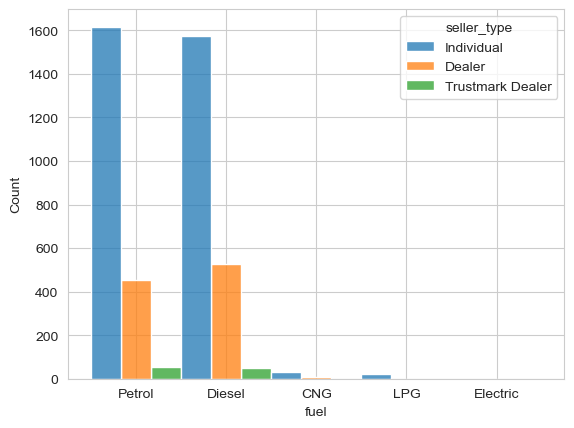

In [94]:
sns.histplot(df, x='fuel', hue='seller_type', multiple='dodge')

---
Задание 2. По сводной таблице (`pivot_table`) -
отобразить максимальную стоимость по типу владельца (`owner`). Оставить только
маркеры в виде ∎ зелёного цвета размером 14

<Axes: xlabel='owner', ylabel='selling_price'>

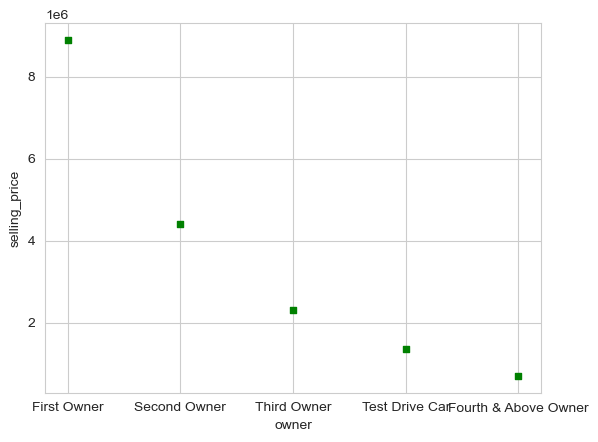

In [247]:
pt = df.pivot_table(index=['owner'], values=['selling_price'], aggfunc='max').sort_values(by='selling_price', ascending=False).reset_index()
pt.plot.scatter(x='owner', y = 'selling_price', color='green', marker='s', s=14)

Задание 3. Отфильтровать данные - год больше 2005
Построить круговую диаграмму, которая отображает процент машин по годам
(`year`). 

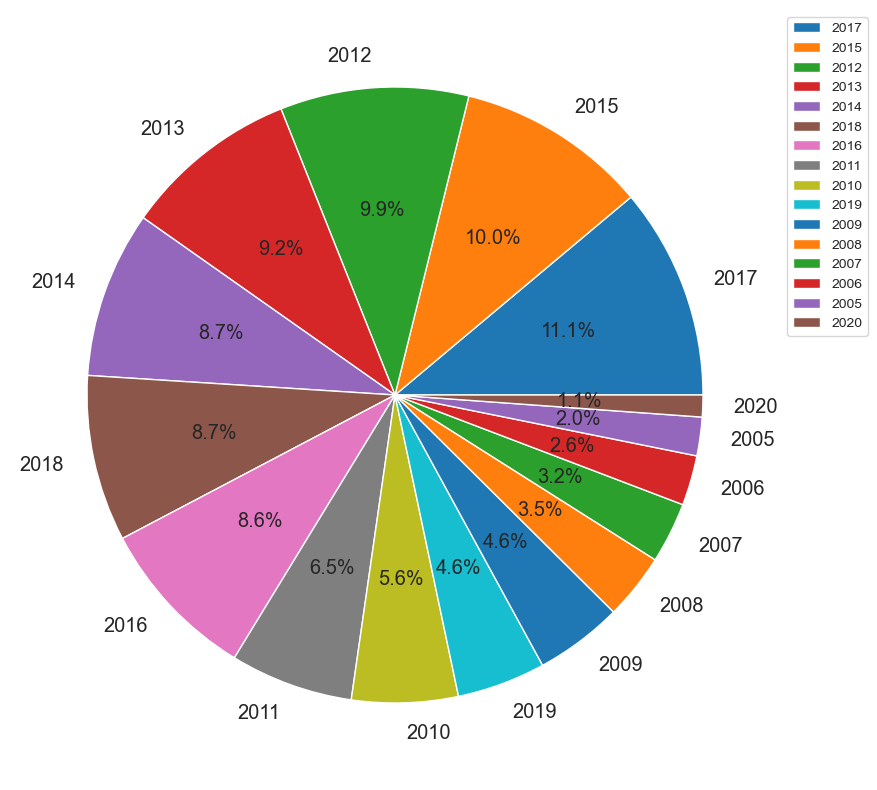

In [246]:
freqs = df['year'].value_counts().reset_index()
freqs = freqs[freqs['year']>=2005]

fig, axes = plt.subplots(
    figsize=(20, 10) # размер графика
)

wedges = axes.pie(freqs['count'], labels=freqs['year'], textprops={'size':'x-large'}, autopct=lambda pct: f"{pct:.1f}%")

axes.legend(
    # wedges,
    fontsize=10,
    bbox_to_anchor=(1,1)
)

plt.show()
# plt.show()

---
6. Hexagonal binning plot

---
**Выводы:**
По графику можно определить, что большинство автомобилей были выпущены в период с 2010 по ~2017 год и продаются по цене менее одного миллиона

<Axes: xlabel='year', ylabel='selling_price'>

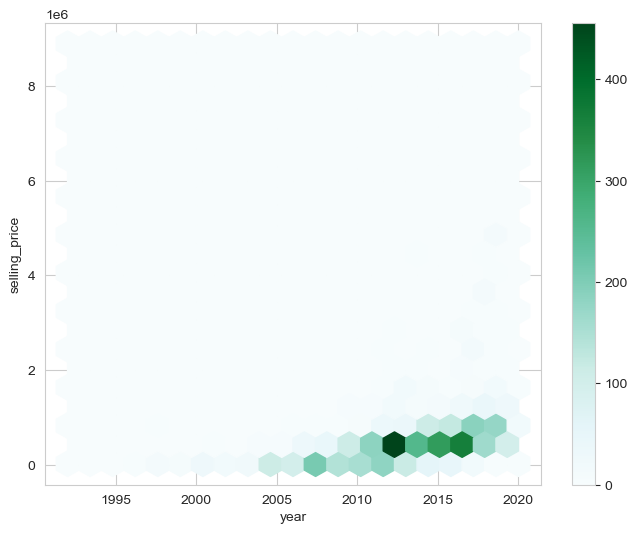

In [84]:
df.plot(x='year', y='selling_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

---
7. Boxplot

---
На графиках видим цену автомобиля по каждой категории топлива 

<Axes: >

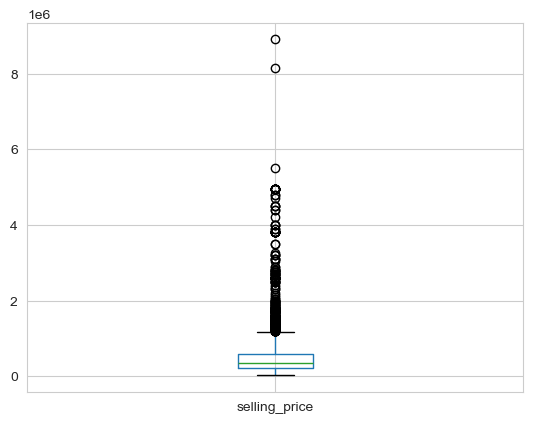

In [ ]:
df.boxplot(column='selling_price')

<Axes: xlabel='fuel', ylabel='selling_price'>

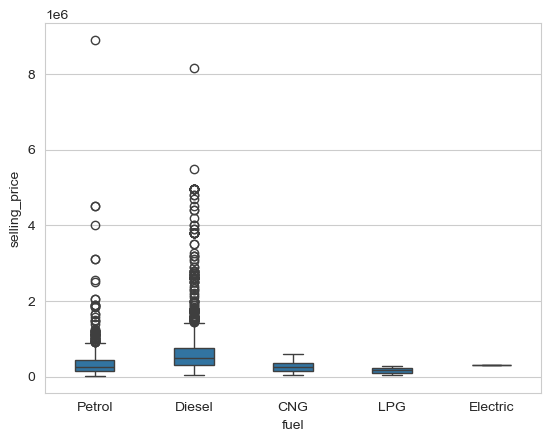

In [86]:

sns.set_style("whitegrid") # стиль для отображения графиков
sns.boxplot(x = df['fuel'], y = df['selling_price'], width = 0.4)

---
8. Boxplot по категориям

---
**Выводы:**


<Axes: xlabel='selling_price', ylabel='selling_price'>

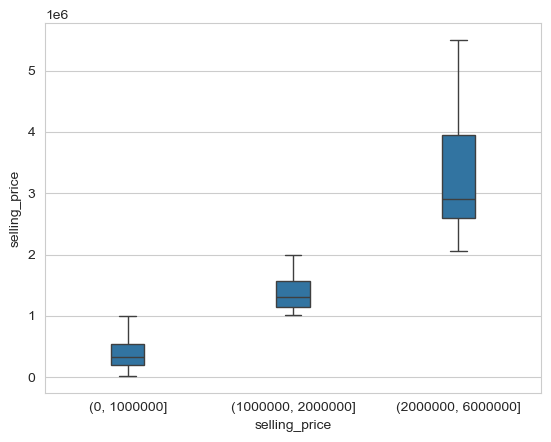

In [87]:
bins = pd.IntervalIndex.from_tuples([(0, 1_000_000), (1_000_000, 2_000_000), (2_000_000, 6_000_000)])
price_categories = pd.cut(df['selling_price'], bins, labels=['low', 'medium', 'high'])
sns.boxplot(x = price_categories, y = df['selling_price'], width=0.2)

---
9. 2 графика boxplot

---
**Выводы:**

Первый график (цена по типу продавца):
1. Более дорогие машины чаще покупают у дилеров, чем у частных продавцов.

Второй график (цена по владельцу):
1. Прослеживается закономерность, чем больше владельцев было у машины, тем дешевле она продаётся.
2. Машины, бывшие лишь в тест-драйве в среднем стоят дороже всего

<Axes: xlabel='owner', ylabel='selling_price'>

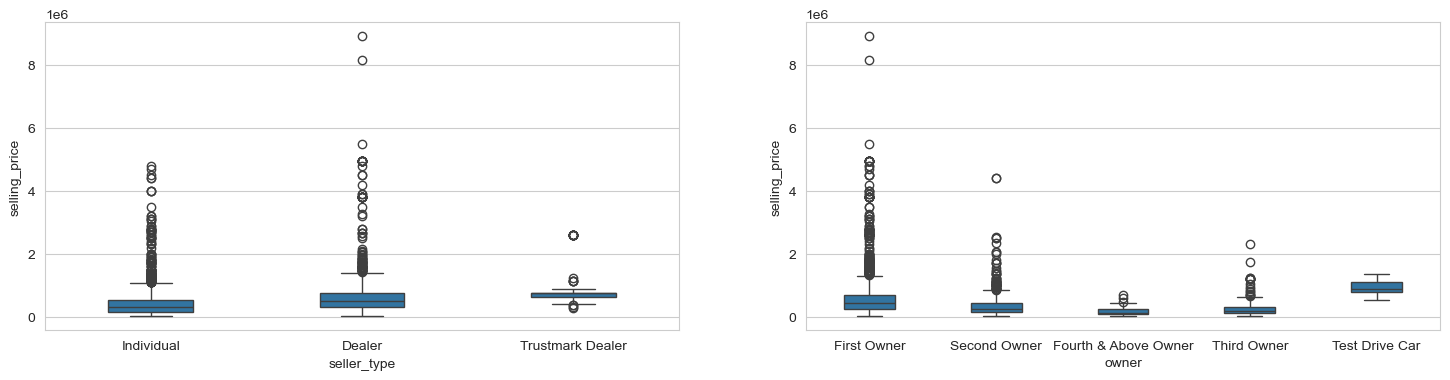

In [88]:
fig, axes = plt.subplots(
    1, # одна строка
    2, # два графика
    figsize=(18, 4) # размер графика
)
sns.boxplot(x = df['seller_type'], y = df['selling_price'], width=0.4, ax=axes[0])
sns.boxplot(x = df['owner'], y = df['selling_price'], width=0.4, ax=axes[1])

---
Вывод
---

В ходе выполнения лабораторной работы №2 были изучены связи между признаками двумерного набора данных `auto2.csv`, выполнена визуализация данных различными способами и проведена их интерпретация.

Была построена матрица диаграмм рассеивания, из которой видно:
- `selling_price` зависит от `year` и `km_driven`: стоимость автомобиля увеличивается с каждым годом, а машины с большим пробегом стоят дешевле
- По зависимости пробега от года выпускя автомобиля можно сделать вывод, что пробег более новых машин, очевидно, меньше.
- Начиная с 2005 года на рынке преобладают автомобили на дизельном топливе.

Были построены гистограммы, с помощью которых были сделаны следующие выводы:
- Большая часть автомобилей произведена с 2012 по 2016 годы с небольшим уклоном в пользу более поздних годов
- Абсолютное большинство представленных автомобилей имеют стоимость в пределах одного-двух миллионов
- Пробег почти никогда не превышает 100.000 км

Произведена оценка коэффициентов корреляции:
- `year` и `selling_price` имеют положительную корреляцию
- `year` и `km_driven` имеют отрицательную корреляцию
- `selling_price` и `km_driven` имеют слабо выраженную отрицательную корреляцию

И ковариации:
- `year` и `selling_price` имеют положительную ковариацию
- `year` и `km_driven` имеют сильно выраженную сотрицательную ковариацию
- `selling_price` и `km_driven` имеют сильно выраженную отрицательную ковариацию

Выполнены задания индивидуального варианта (12):
1. По группировке - `fuel` и количеству машин
каждого типа продавца (`seller_type`) построена диаграмма
2. По сводной таблице (`pivot_table`) -
отображена максимальная стоимость по типу владельца (`owner`). Оставлены только
маркеры в виде ∎ зелёного цвета размером 14
3. Отфильтрованы данные - год больше 2005.
Построена круговая диаграмма, которая отображает процент машин по годам
(`year`). 

Построен график типа **hexagonal binning plot**. По графику можно определить, что большинство автомобилей были выпущены в период с 2010 по ~2017 год и продаются по цене менее одного миллиона.

Построено несколько графиков типа **boxplot**:
- Цена автомобиля по каждой категории топлива
- График цен по категориям
- График цены по типу продавца
- График цены по владельцу

Выводы по графикам **boxplot**:

Цена по типу продавца:
1. Более дорогие машины чаще покупают у дилеров, чем у частных продавцов.

Цена по владельцу:
1. Прослеживается закономерность, чем больше владельцев было у машины, тем дешевле она продаётся.
2. Машины, бывшие лишь в тест-драйве в среднем стоят дороже всего